In [1]:
import numpy as np
import pandas as pd
import scipy
from scipy.cluster import hierarchy 
import scipy.cluster.hierarchy
from scipy.cluster.hierarchy import fcluster
from scipy.spatial import distance_matrix 
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering 
import pylab

In [2]:
source_df = pd.read_csv('../csvs/students_knowledge.csv')
source_df = source_df.loc[:, ~source_df.columns.str.contains('^Unnamed')]
source_df = source_df.drop('Attribute Information:', axis=1)
source_df.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,very_low
1,0.08,0.08,0.10,0.24,0.90,High
2,0.06,0.06,0.05,0.25,0.33,Low
3,0.10,0.10,0.15,0.65,0.30,Middle
4,0.08,0.08,0.08,0.98,0.24,Low


In [3]:
df = source_df.drop(' UNS', axis=1)
df.head()

,STG,SCG,STR,LPR,PEG
0,0.00,0.00,0.00,0.00,0.00
1,0.08,0.08,0.10,0.24,0.90
2,0.06,0.06,0.05,0.25,0.33
3,0.10,0.10,0.15,0.65,0.30
4,0.08,0.08,0.08,0.98,0.24


In [4]:
x = df.values[:,:]
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx[:5]

array([[0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.08080808, 0.08888889, 0.10526316, 0.24242424, 0.96774194],
       [0.06060606, 0.06666667, 0.05263158, 0.25252525, 0.35483871],
       [0.1010101 , 0.11111111, 0.15789474, 0.65656566, 0.32258065],
       [0.08080808, 0.08888889, 0.08421053, 0.98989899, 0.25806452]])

# Using SciPy

In [5]:
leng = feature_mtx.shape[0]
D = scipy.zeros([leng,leng])
for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])

In [6]:
Z = hierarchy.linkage(D, 'complete')
max_clust = 4
clusters = fcluster(Z, max_clust, criterion='maxclust')
clusters[:]

array([3, 4, 2, 2, 3, 1, 1, 2, 2, 4, 1, 2, 2, 4, 1, 1, 3, 2, 2, 1, 2, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2,
       2, 1, 1, 1, 2, 2, 2, 2, 2, 4, 1, 2, 2, 1, 1, 2, 2, 4, 4, 2, 2, 2,
       2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2,
       2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1,
       1, 1, 2, 2, 1, 2, 2, 2, 4, 1, 2, 2, 1, 4, 4, 4, 4, 2, 2, 2, 2, 1,
       2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1,
       2, 2, 1, 2, 2, 2, 4, 1, 2, 2, 4, 1, 2, 4, 4, 4, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 4, 2, 1, 1, 2, 4, 2, 2, 4, 2, 1, 1, 2, 2, 1, 1,
       2, 2, 1, 1, 2, 4, 2, 2, 4, 4, 2, 1, 2, 4, 1, 1, 2, 1, 1, 1, 2, 4,
       2, 2, 2, 4, 4, 1, 4, 2, 4, 1, 2, 4, 4, 4, 2, 4], dtype=int32)

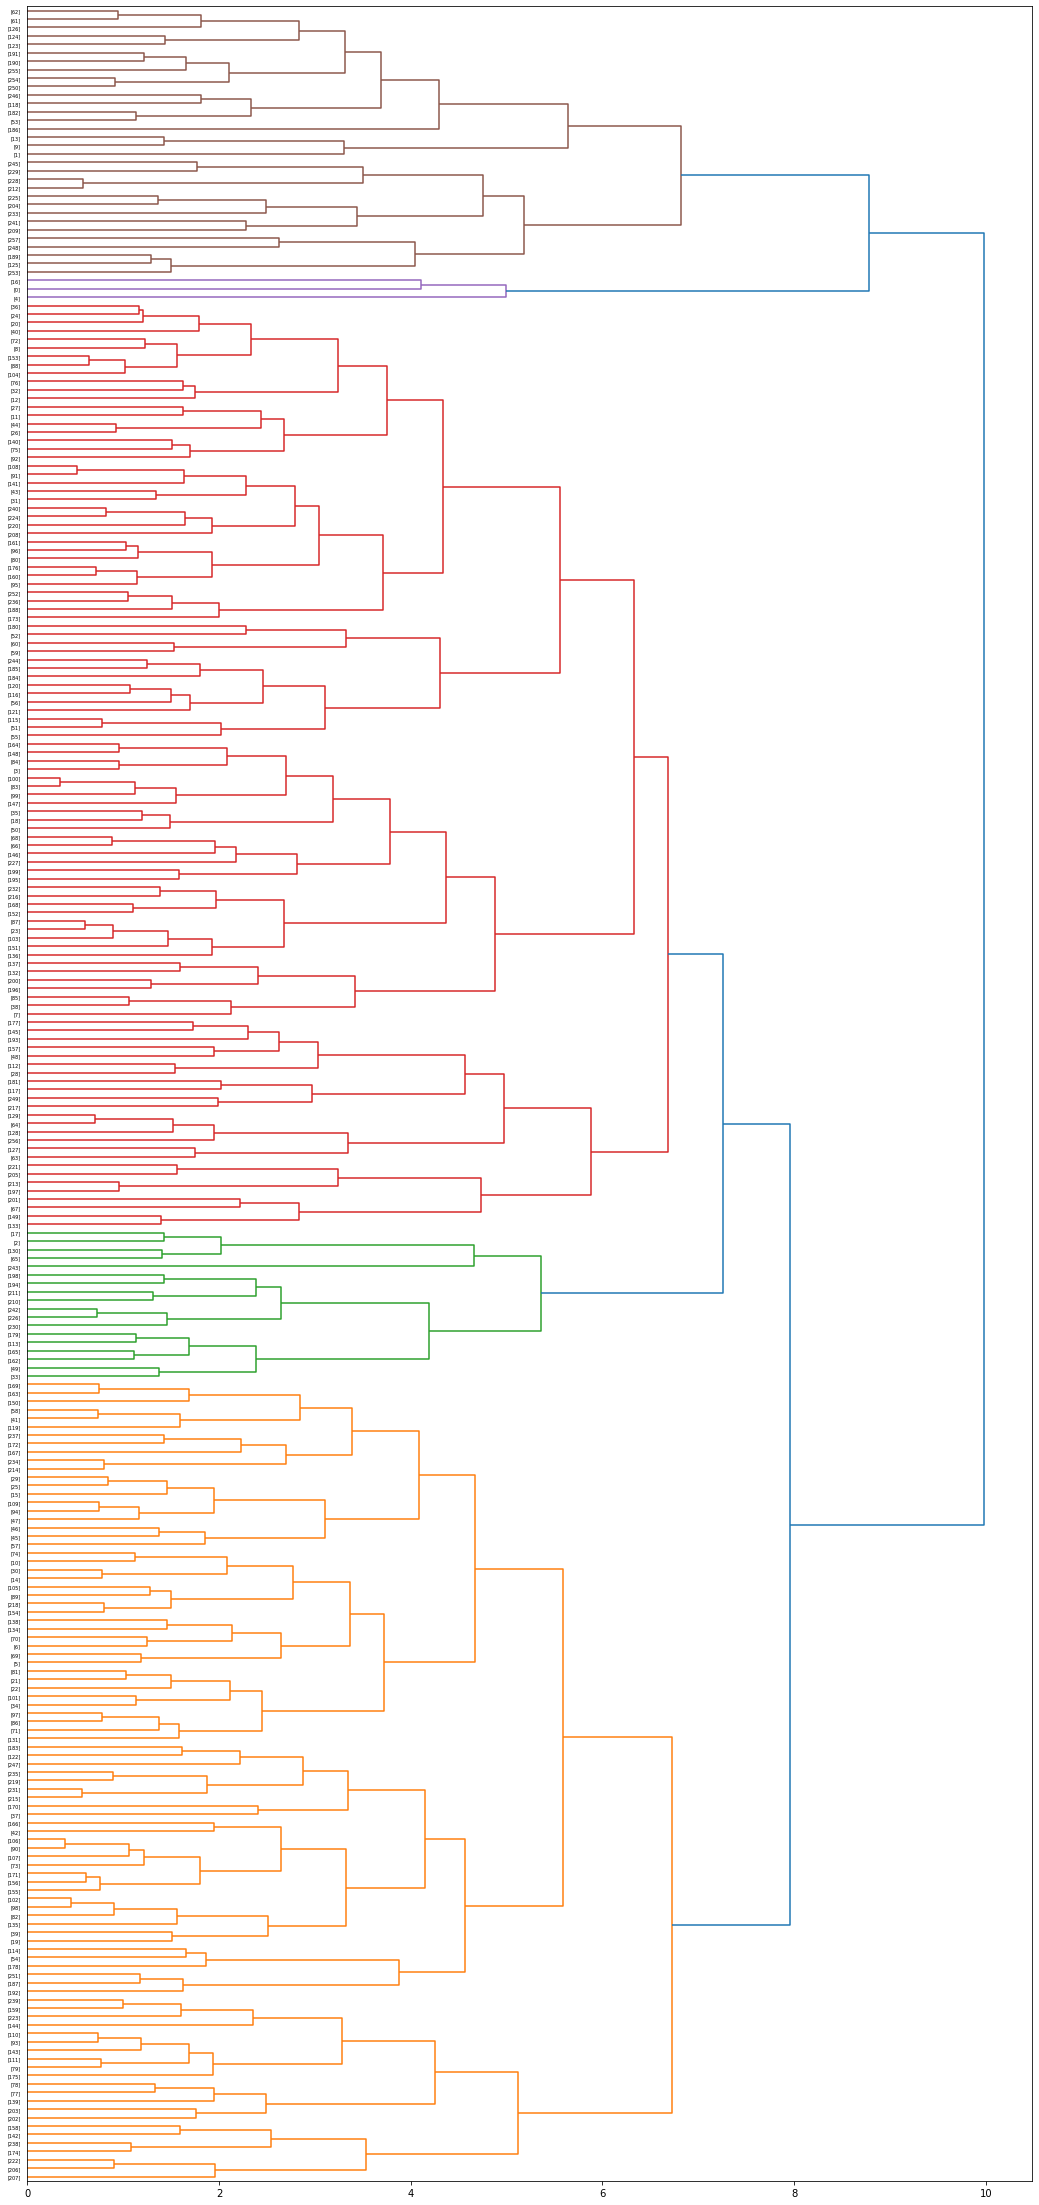

In [7]:
fig = pylab.figure(figsize=(18,40))
dendro = hierarchy.dendrogram(Z, leaf_label_func=(lambda id: '[%s]' %id), leaf_rotation=0,orientation = 'right')

In [8]:
mapping_dict = { 1: 'Middle', 2: 'Low', 3:'very_low', 4:'High'}
source_df["SciPy_cluster"] = clusters
source_df["SciPy_label"] = [mapping_dict[x] for x in clusters]
source_df['SciPy_eq'] = np.where(source_df[" UNS"] == source_df["SciPy_label"], True, False)
'accuration : ' + str(round(source_df.loc[source_df['SciPy_eq'] == True].count()[1] / source_df.shape[0] * 100, 3)) + ' %'

'accuration : 55.426 %'

# Using SciKit

In [9]:
dist_matrix = distance_matrix(feature_mtx,feature_mtx) 
print(dist_matrix)

[[0.         1.01034919 0.44784722 ... 1.5676492  1.46092968 1.86811385]
 [1.01034919 0.         0.61597437 ... 1.15166639 1.38057927 1.44588053]
 [0.44784722 0.61597437 0.         ... 1.28697208 1.25028214 1.54387264]
 ...
 [1.5676492  1.15166639 1.28697208 ... 0.         0.65112959 0.60797579]
 [1.46092968 1.38057927 1.25028214 ... 0.65112959 0.         0.62612249]
 [1.86811385 1.44588053 1.54387264 ... 0.60797579 0.62612249 0.        ]]


In [10]:
agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'complete')
agglom.fit(feature_mtx)
agglom.labels_

array([3, 1, 3, 3, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 2, 3, 3, 2,
       1, 3, 3, 1, 3, 1, 0, 1, 1, 1, 1, 2, 2, 2, 3, 2, 3, 3, 3, 0, 0, 1,
       3, 1, 1, 1, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 3,
       3, 3, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 3, 3, 2, 3,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 3, 3, 1, 1, 1, 1, 1,
       1, 1, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 3, 1,
       3, 2, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 3, 2, 2, 2, 3, 3,
       1, 1, 1, 0, 1, 0, 1, 1, 2, 2, 3, 2, 2, 2, 3, 2, 1, 1, 2, 2, 0, 1,
       1, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 1, 3, 2,
       2, 1, 3, 2, 1, 1, 0, 1, 0, 1, 1, 0, 2, 2, 2, 2, 0, 1, 3, 2, 1, 1,
       1, 1, 0, 0, 1, 0, 2, 2, 2, 2, 2, 1, 3, 0, 0, 1, 2, 2, 0, 0, 1, 0,
       2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0], dtype=int64)

In [11]:
mapping_dict = { 0: 'High', 1: 'Middle', 2: 'Low', 3:'very_low'}
source_df["SciKit_cluster"] = agglom.labels_
source_df["SciKit_label"] = [mapping_dict[x] for x in agglom.labels_]
source_df['SciKit_eq'] = np.where(source_df[" UNS"] == source_df["SciKit_label"], True, False)
'accuration : ' + str(round(source_df.loc[source_df['SciKit_eq'] == True].count()[1] / source_df.shape[0] * 100, 3)) + ' %'

'accuration : 43.023 %'

In [12]:
source_df

,STG,SCG,STR,LPR,PEG,UNS,SciPy_cluster,SciPy_label,SciPy_eq,SciKit_cluster,SciKit_label,SciKit_eq
0,0.00,0.00,0.00,0.00,0.00,very_low,3,very_low,True,3,very_low,True
1,0.08,0.08,0.10,0.24,0.90,High,4,High,True,1,Middle,False
2,0.06,0.06,0.05,0.25,0.33,Low,2,Low,True,3,very_low,False
3,0.10,0.10,0.15,0.65,0.30,Middle,2,Low,False,3,very_low,False
4,0.08,0.08,0.08,0.98,0.24,Low,3,very_low,False,3,very_low,False
...,...,...,...,...,...,...,...,...,...,...,...,...
253,0.61,0.78,0.69,0.92,0.58,High,4,High,True,0,High,True
254,0.78,0.61,0.71,0.19,0.60,Middle,4,High,False,0,High,False
255,0.54,0.82,0.71,0.29,0.77,High,4,High,True,0,High,True
256,0.50,0.75,0.81,0.61,0.26,Middle,2,Low,False,2,Low,False


Text(0.5, 0, 'PEG')

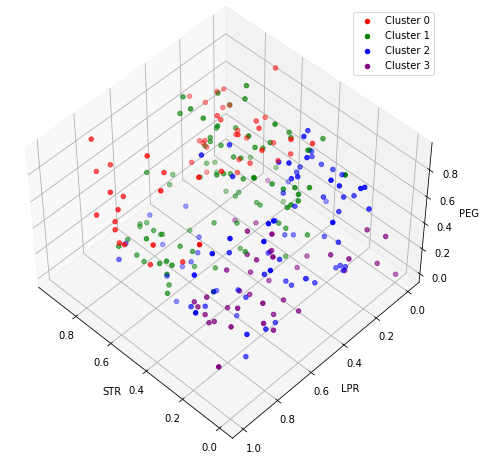

In [13]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()

colors = ['red', 'green', 'blue', 'purple']
for i in range(max(agglom.labels_) + 1):
    ax_df = source_df.where(source_df["SciKit_cluster"] == i)
    ax.scatter(ax_df['STR'], ax_df['LPR'], ax_df['PEG'], c=colors[i], label='Cluster '+str(i))

ax.legend()
ax.set_xlabel('STR')
ax.set_ylabel('LPR')
ax.set_zlabel('PEG')